# Clase 6

### ¿Cómo les resultó la última tarea?

### ¿Preguntas de la clase asincrónica?

...

...

### Cuestionario

1) ¿Cómo escribir la matriz `((2,2),(2,2))` usando `np.ones` y producto de un escalar por un `nparray`?

2) ¿Qué error nos da `numpy` cuando queremos calcular la inversa de una matriz cuadrada no invertible?

## Aprendizaje profundo

En esta parte vamos a ver los fundamentos del aprendizaje profundo. Vamos a ver cómo funcionan las redes neuronales convolucionales (CNNs), que es el tipo de red neuronal que se usa para procesamiento de imágenes.
Luego vamos a implementar una red neuronal convolucional que aprende a reconocer dígitos.

### Teoría
#### ¿Qué es una red neuronal artificial (ANN)?
Una red neuronal artificial es un modelo matemático que se puede representar como una sucesión de _capas_ que van desde los datos de entrada ($X$) a los datos de salida ($y$, o etiquetas). Cada capa se "comunica" sólo con la inmediata anterior y posterior.

![caption](files/NN.png)

Las capas intermedias se llaman _capas ocultas_ o _latentes_. Cada neurona de una capa recibe como entrada una combinación lineal de las salidas de las neuronas de la capa anterior. 

Cada flecha en la figura de arriba representa el _peso_ que le damos a la neurona de la izquierda en la entrada de la neurona de la derecha.

Estos pesos son los parámetros que la red "aprende", de la misma manera que en una regresión lineal sencilla ajustábamos pendiente y ordenada al origen de la recta.

**Pregunta**: *¿Cuántos parámetros "ajustables" tiene la red de arriba?*

#### Funciones de activación
Como sabemos de álgebra lineal, el proceso que describimos hasta ahora equivale a multiplicar vectores por matrices sucesivas veces, es decir hacer $y = B(Ax)$.

Pero esto es equivalente a multiplicar por una sola matriz $C=BA$, es decir, a no tener ninguna capa oculta!

En lugar de hacer esto, para tener más flexibilidad en el tipo de comportamiento que la red captura, en cada capa utilizamos una **función de activación no lineal**.

#### ¿Cómo entrenamos una red neuronal?

En general usamos una técnica **iterativa** que se llama *descenso por gradiente*, donde la "x" es el vector de todos los parámetros de la red (la derivada se convierte en un gradiente) y la función que queremos optimizar es una medida del error que la red está cometiendo en la iteración presente. 

Esta función a optimizar se llama **función de pérdida** (*loss function*) o **función de costo**.

![caption](files/gradient_descent.png)

Para calcular el gradiente respecto de cada uno de los parámetros, se debe aplicar la **regla de la cadena** debido a las interdependencias que hay entre las distintas neuronas de la red. La aplicación de la regla en la cadena para redes neuronales se llama **retropropagación**.

En cada iteración, el valor de los pesos de la red se corrige en una cantidad dada por el gradiente de la función de pérdida.

#### Ver también
- [Este](https://www.youtube.com/watch?v=aircAruvnKk) es un video **muy bueno** para ganar una mejor intuición de lo que ocurre en una red neuronal.
- Estos videos del mismo canal explican la matemática detrás de cómo se entrena una red:
  - [Descenso por gradiente](https://www.youtube.com/watch?v=IHZwWFHWa-w)
  - [Retropropagación](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

![caption](files/loss_function_nn.jpeg)

### Implementación

Vamos a ver cómo usar PyTorch para implementar redes neuronales.
Para importar la librería, ejecutamos:

In [43]:
import torch

In [44]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [23]:
print("La versión de PyTorch que tengo instalada es la %s." % (torch.__version__))

La versión de PyTorch que tengo instalada es la 1.4.0.


¿Cómo hacemos para generar la red neuronal de más arriba?

Primero, definamos la **arquitectura** de la red neuronal: 2 neuronas de entrada, 1 capa oculta con 3 neuronas y 2 neuronas de salida.

Para ello tenemos que construir una clase que _herede_ de `nn.Module` (¿recuerdan herencia de clases [semana 3]?)

In [54]:
class NuestraPrimeraRed(nn.Module):
    
    def __init__(self):
        self.capa12 = nn.Linear(2, 3)
        self.capa23 = nn.Linear(3, 2)
        
    def forward(self, x):
        x = self.capa12(x)
        x = F.sigmoid(x)
        x = self.capa23(x)
        return x

Listo!

Ahora podemos inicializar el modelo, llamando al constructor:

In [ ]:
modelo = NuestraPrimeraRed()

En el siguiente ejemplo vamos a ver cómo entrenaríamos una red.

#### Redes neuronales convolucionales (CNNs)

Las CNNs se basan en el uso de **filtros convolucionales**.

<img src="files/filtro_convolucional.png" alt="Drawing" style="width: 200px;"/>

![caption](files/cnn.png)

### Datos

Vamos a trabajar con un dataset llamado **MNIST**, el cual contiene imágenes de dígitos de 28x28 píxeles.

Para bajarlo, podemos usar PyTorch:

In [124]:
from torchvision import datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

(En [este link](https://pytorch.org/docs/stable/torchvision/datasets.html) van a poder encontrar otros datasets.)

Examinemos un poco los datos:

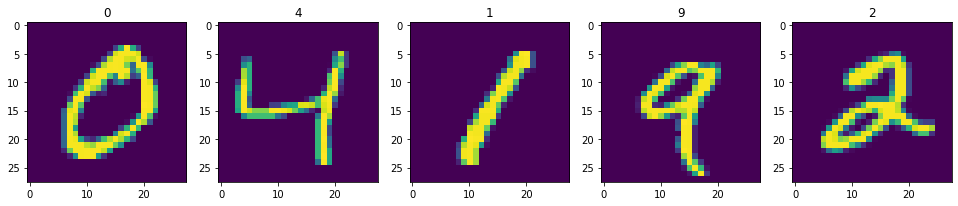

In [125]:
# Visualicemos las imágenes

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10))
for i in range(1, 6):
    img = transforms.ToPILImage(mode='L')(mnist_trainset[i][0])
    fig.add_subplot(1, 6, i)
    plt.title(mnist_trainset[i][1])
    plt.imshow(img)
plt.show()


### Preparemos los datos

In [132]:
from torch.utils.data import Subset

mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_testset, [int(0.9 * len(mnist_testset)), int(0.1 * len(mnist_testset))])

# para traernos un subconjuntos de los datos
# train_dataloader = torch.utils.data.DataLoader(Subset(mnist_trainset, range(5000)), batch_size=64, shuffle=True,)
# val_dataloader = torch.utils.data.DataLoader(Subset(mnist_valset, range(1000)), batch_size=32, shuffle=False)
# test_dataloader = torch.utils.data.DataLoader(Subset(mnist_testset, range(500)), batch_size=32, shuffle=False)

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True,)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=32, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

0) Definamos la arquitectura de la red neuronal

In [127]:
class NuestraSegundaRed(nn.Module):
    def __init__(self):
        super(NuestraSegundaRed, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

1) Inicializamos el modelo

In [128]:
modelo = NuestraSegundaRed()

1) Definimos la **función de pérdida**. En este caso usamos la *entropía cruzada* (`CrossEntropyLoss`), que es la forma estándar de medir el error cuando la salida es una variable categórica (en lugar de una continua):

In [129]:
criterio = torch.nn.CrossEntropyLoss()

2) Definimos el algoritmo que vamos a usar para entrenar la red (el **optimizador**):

In [130]:
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001)

### Entrenamiento de la red

In [ ]:
no_epochs = 100
train_loss = list()
val_loss = list()
best_val_loss = 1

for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    modelo.train()

    # training
    for itr, (image, label) in enumerate(train_dataloader):
        optimizador.zero_grad()

        pred = modelo(image)

        loss = criterio(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizador.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    
    # validation
    modelo.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):
        pred = modelo(image)

        loss = criterio(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    hora = time.strftime("%H:%M:%S") 
    print('\n{} - Epoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(hora, epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(modelo.state_dict(), "model.dth")


21:22:01 - Epoch: 1/100, Train Loss: 0.10854055, Val Loss: 0.03604278, Val Accuracy: 0.98777778
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.03604278

21:23:35 - Epoch: 2/100, Train Loss: 0.06935476, Val Loss: 0.03309791, Val Accuracy: 0.98666667
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.03309791


In [122]:
modelo.load_state_dict(torch.load("model.dth"))

<All keys matched successfully>

In [ ]:
import numpy as np

fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, no_epochs+1), train_loss, label="Train loss")
plt.plot(np.arange(1, no_epochs+1), val_loss, label="Validation loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title("Loss Plots")
plt.legend(loc='upper right')
# plt.show()
plt.savefig('loss.png')

### Evaluar modelo en datos reales (tarea?)

In [ ]:
modelo.eval()